In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date

In [2]:
# Files to load
raw_data = 'resources/btc.csv'

In [3]:
raw_df = pd.read_csv(raw_data)
raw_df.head()

,date,AdrActCnt,AssetEODCompletionTime,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0,1614334883,0,0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2009-01-04,0,1614334883,0,0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2009-01-05,0,1614334883,0,0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2009-01-06,0,1614334884,0,0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2009-01-07,0,1614334885,0,0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 44 columns):
date                      4477 non-null object
AdrActCnt                 4477 non-null int64
AssetEODCompletionTime    4477 non-null int64
BlkCnt                    4477 non-null int64
BlkSizeByte               4477 non-null int64
BlkSizeMeanByte           4471 non-null float64
CapMVRVCur                3916 non-null float64
CapMrktCurUSD             3916 non-null float64
CapRealUSD                4477 non-null float64
DiffMean                  4471 non-null float64
FeeMeanNtv                4219 non-null float64
FeeMeanUSD                3916 non-null float64
FeeMedNtv                 4219 non-null float64
FeeMedUSD                 3916 non-null float64
FeeTotNtv                 4477 non-null float64
FeeTotUSD                 3916 non-null float64
HashRate                  4471 non-null float64
IssContNtv                4471 non-null float64
IssContPctAnn             4471 non-nul

In [5]:
# drop all those rows which 
# have any 'nan' value in it.

# raw_df.dropna(inplace = True)
# raw_df.head()

In [6]:
# Pull columns to for analysis

df = pd.DataFrame()
df['Date'] = raw_df['date']
df['Active_Address_Count'] = raw_df['AdrActCnt']
df['Market_Cap'] = raw_df['CapMrktCurUSD']
df.head()

,Date,Active_Address_Count,Market_Cap
0,2009-01-03,0,NaN
1,2009-01-04,0,NaN
2,2009-01-05,0,NaN
3,2009-01-06,0,NaN
4,2009-01-07,0,NaN


In [7]:
df.dropna(inplace=True)
df.head()

,Date,Active_Address_Count,Market_Cap
561,2010-07-18,860,295959.152000
562,2010-07-19,929,279285.200000
563,2010-07-20,936,259000.404990
564,2010-07-21,784,275266.471297
565,2010-07-22,594,203749.573975


In [8]:
# Format 'Date' column in datetime.date format

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916 entries, 561 to 4476
Data columns (total 3 columns):
Date                    3916 non-null datetime64[ns]
Active_Address_Count    3916 non-null int64
Market_Cap              3916 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 122.4 KB


In [9]:
# Set index to 'Date' column
df.set_index('Date', inplace=True)

In [10]:
# Calculating the simple moving 30 day average over time series
df['Mcap_SMA_30'] = df.Market_Cap.rolling(30, min_periods=1).mean()

# NOTE, data must be ascending (old -> new) for rolling averages to calculate correctly, sort DF after calcs are complete

In [11]:
df.head(130)

,Active_Address_Count,Market_Cap,Mcap_SMA_30
Date,,,
2010-07-18,860,2.959592e+05,2.959592e+05
2010-07-19,929,2.792852e+05,2.876222e+05
2010-07-20,936,2.590004e+05,2.780816e+05
2010-07-21,784,2.752665e+05,2.773778e+05
2010-07-22,594,2.037496e+05,2.626522e+05
2010-07-23,655,2.117357e+05,2.541661e+05
2010-07-24,959,1.911000e+05,2.451566e+05
2010-07-25,2130,1.776705e+05,2.367209e+05
2010-07-26,1250,1.975428e+05,2.323678e+05


In [12]:
df['ln_NV'] = np.log(df['Mcap_SMA_30'])

In [13]:
df.head()

,Active_Address_Count,Market_Cap,Mcap_SMA_30,ln_NV
Date,,,,
2010-07-18,860,295959.152000,295959.152000,12.597977
2010-07-19,929,279285.200000,287622.176000,12.569403
2010-07-20,936,259000.404990,278081.585663,12.535670
2010-07-21,784,275266.471297,277377.807072,12.533136
2010-07-22,594,203749.573975,262652.160452,12.478586


## Metcalfe Determination, NV ~ n^2

In [14]:
# Metcalfe Determination NV ~ n^2
metcalfe_df = pd.DataFrame()
# Metcalfe Daily Active Address (DAA) calc
metcalfe_df['metcalfe_n'] = df.Active_Address_Count**2
# Metcalfe DAA SMA calc
metcalfe_df['SMA_30'] = metcalfe_df.metcalfe_n.rolling(30, min_periods=1).mean()
# Metcalfe Moving Average of ln(n^)
metcalfe_df['ln_n2'] = np.log(metcalfe_df['SMA_30'])
metcalfe_df.head()

,metcalfe_n,SMA_30,ln_n2
Date,,,
2010-07-18,739600,739600.000000,13.513865
2010-07-19,863041,801320.500000,13.594016
2010-07-20,876096,826245.666667,13.624647
2010-07-21,614656,773348.250000,13.558485
2010-07-22,352836,689245.800000,13.443353


## Odlyzko Determination NV ~ n*ln(n)

In [15]:
# Odlyzko Determination NV ~ n*ln(n)
odlyzko_df = pd.DataFrame()
# Odlyzko Daily Active Address (DAA) calc
odlyzko_df['odlyzko_n'] = df.Active_Address_Count * np.log(df.Active_Address_Count)
# 30 day Simple Moving Average of Odlyzko DAA
odlyzko_df['n_SMA_30'] = odlyzko_df.odlyzko_n.rolling(30, min_periods=1).mean()
# Natural log of Odlyzko DAA 30 day SMA
odlyzko_df['ln_SMA_30'] = np.log(odlyzko_df.n_SMA_30)
# Final 30 day Simple Moving Average of Odlyzko DAA
odlyzko_df['MA_ln_SMA_30'] = odlyzko_df.ln_SMA_30.rolling(30, min_periods=1).mean()
odlyzko_df.head()

,odlyzko_n,n_SMA_30,ln_SMA_30,MA_ln_SMA_30
Date,,,,
2010-07-18,5810.961855,5810.961855,8.667501,8.667501
2010-07-19,6348.887018,6079.924437,8.712748,8.690124
2010-07-20,6403.752086,6187.866986,8.730346,8.703532
2010-07-21,5224.896672,5947.124408,8.690663,8.700314
2010-07-22,3793.806316,5516.460789,8.615492,8.683350


## Clearblocks Determination NV ~ n^1.5

In [16]:
clearblocks_df = pd.DataFrame()
# Clearblocks Daily Active Address (DAA) calc
clearblocks_df['clearblocks_n'] = df.Active_Address_Count ** 1.5
# 30 day Simple Moving Average of Clearblocks DAA
clearblocks_df['SMA_30'] = clearblocks_df.clearblocks_n.rolling(30, min_periods=1).mean()
# Natural log of Clearblocks DAA 30 day SMA
clearblocks_df['ln_n'] = np.log(clearblocks_df.SMA_30)
# Final 30 day Simple Moving Average of Clearblocks DAA
clearblocks_df['MA_ln_n'] = clearblocks_df.ln_n.rolling(30, min_periods=1).mean()
clearblocks_df.head()

,clearblocks_n,SMA_30,ln_n,MA_ln_n
Date,,,,
2010-07-18,25220.150674,25220.150674,10.135399,10.135399
2010-07-19,28315.456715,26767.803694,10.194955,10.165177
2010-07-20,28636.093588,27390.566992,10.217954,10.182769
2010-07-21,21952.000000,26030.925244,10.167041,10.178837
2010-07-22,14477.036437,23720.147483,10.074080,10.157886


In [17]:
# look into numpy and scipy 
a1 = 0
b1 = 1
a2 = -3.48
b2 = 1.65

df['upperbound'] = a1 + (b1*metcalfe_df.ln_n2)
df['lowerbound'] = a2 + (b2*odlyzko_df.MA_ln_SMA_30)
df.head()

,Active_Address_Count,Market_Cap,Mcap_SMA_30,ln_NV,upperbound,lowerbound
Date,,,,,,
2010-07-18,860,295959.152000,295959.152000,12.597977,13.513865,10.821377
2010-07-19,929,279285.200000,287622.176000,12.569403,13.594016,10.858705
2010-07-20,936,259000.404990,278081.585663,12.535670,13.624647,10.880827
2010-07-21,784,275266.471297,277377.807072,12.533136,13.558485,10.875519
2010-07-22,594,203749.573975,262652.160452,12.478586,13.443353,10.847527


In [18]:
# END OF SCRIPT SORTING

# Sort DataFrame to show newest data first.
df.sort_values(by=['Date'], ascending=False)

KeyError: 'Date'

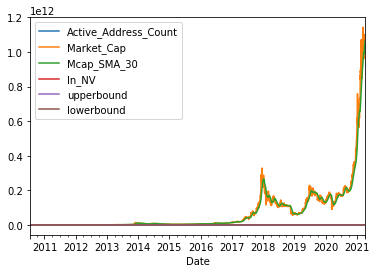

In [19]:
df.plot()